In [ ]:
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('ulasan_femaledaily.csv')

# 2. Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned'] = df['Reviews'].astype(str).apply(preprocess_text)

# 3. Lexicon lists (bisa dikembangkan sesuai kebutuhan)
positive_words = {'bagus', 'suka', 'mantap', 'puas', 'recommended', 'cocok', 'baik', 'top', 'nyaman', 'senang'}
negative_words = {'jelek', 'buruk', 'tidak', 'mengecewakan', 'parah', 'mahal', 'kurang', 'gagal', 'benci'}

# 4. Lexicon-based sentiment function
def lexicon_sentiment(text):
    words = text.split()
    pos = sum(1 for w in words if w in positive_words)
    neg = sum(1 for w in words if w in negative_words)
    if pos > neg:
        return 'positive'
    elif neg > pos:
        return 'negative'
    else:
        return 'neutral'

df['lexicon_sentiment'] = df['cleaned'].apply(lexicon_sentiment)

# 5. Simpan hasil
print(df[['Reviews', 'lexicon_sentiment']].head())
# df[['Reviews', 'lexicon_sentiment']].to_csv('sentiment_results_lexicon.csv', index=False)

                                             Reviews lexicon_sentiment
0  Awal pake skincare aku pake natural republic, ...           neutral
1  aku pake ini dari aku kuliah sampe sekarang ka...           neutral
2  Tekstur nya gel jadi ringan di kulit terus mel...          positive
3  Produk serba bisa, buat rambut bisa buat pelem...           neutral
4  Suka banget pake produk ini, melembabkan sekal...          positive



Distribusi Label Sentimen:
lexicon_sentiment
positive    910
neutral     479
negative    101
Name: count, dtype: int64

Jumlah Data Training: 1192
Jumlah Data Testing: 298

Dimensi Matriks TF-IDF Training: (1192, 5000)

Evaluasi Model:
Akurasi: 0.61

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        23
     neutral       0.80      0.04      0.08        96
    positive       0.61      1.00      0.76       179

    accuracy                           0.61       298
   macro avg       0.47      0.35      0.28       298
weighted avg       0.62      0.61      0.48       298



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

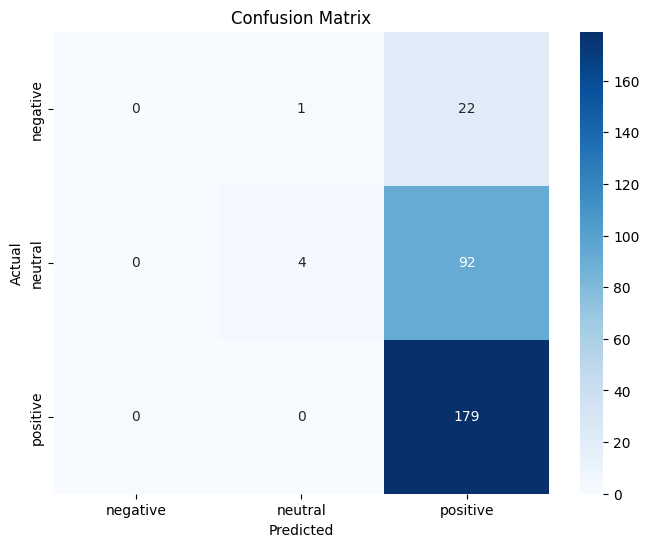

In [7]:
# 3. Cek distribusi label
print("\nDistribusi Label Sentimen:")
print(df['lexicon_sentiment'].value_counts())

# 4. Split Data (80% training, 20% testing)
X = df['Reviews']
y = df['lexicon_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nJumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")

# 5. Feature Extraction dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"\nDimensi Matriks TF-IDF Training: {X_train_tfidf.shape}")

# 6. Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 7. Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)

print("\nEvaluasi Model:")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=nb_model.classes_, 
                yticklabels=nb_model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred)